#**Archisha Sinha**
##Course: Deep Learning
##Title: ANN with varying Learning Rates, Momentum and types of Optimizers (Adagrad, RMS Prop, Adam)

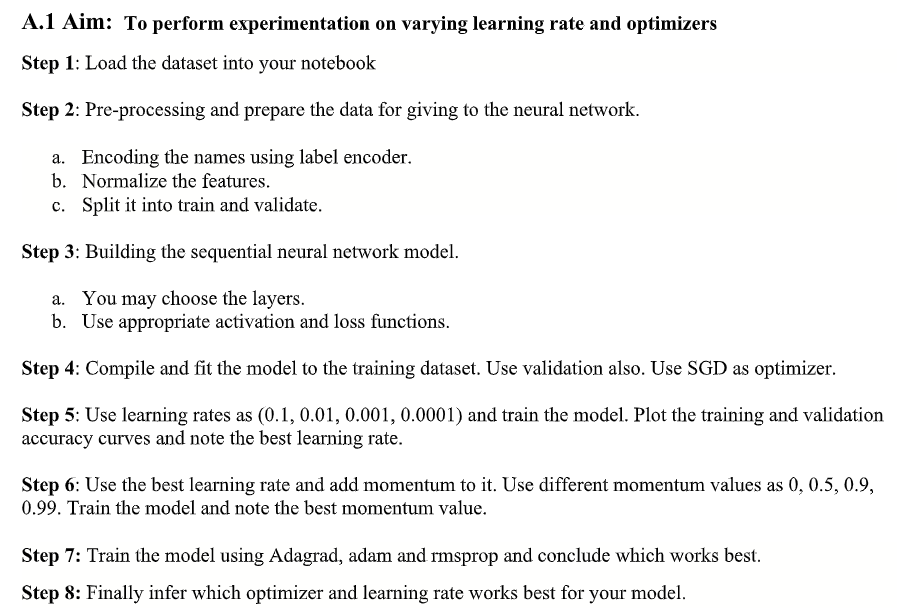

# Step 1: Importing Libraries

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


#Step 2: Reading the Iris dataset

In [ ]:
data = pd.read_csv("/content/Iris.csv")

In [ ]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#Step 3: Pre-processing and prepare the data for giving to the neural network.

In [ ]:
# One Hot Encoding the target variable
df = pd.get_dummies(data['Species'])
df.head()

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [ ]:
# Dropping the original target variable
data.drop(['Species'],axis=1,inplace=True)

In [ ]:
# Concatenating the original data and the one hot encoded targets
final = pd.concat([data,df],axis=1)
final.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [ ]:
# Scaling or Standardizing the dataset
scaler = StandardScaler()
final.iloc[:,0:4] = scaler.fit_transform(final.iloc[:,0:4])
final.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
0,-0.900681,1.032057,-1.341272,-1.312977,1,0,0
1,-1.143017,-0.124958,-1.341272,-1.312977,1,0,0
2,-1.385353,0.337848,-1.398138,-1.312977,1,0,0
3,-1.506521,0.106445,-1.284407,-1.312977,1,0,0
4,-1.021849,1.263460,-1.341272,-1.312977,1,0,0


In [ ]:
# Splitting data into training and testing
from sklearn.model_selection import train_test_split
x= final.iloc[:, 0:4]
y=final.iloc[:,4:]
# using the train test split function
x_train, x_test, y_train, y_test = train_test_split(x,y ,
                                                    random_state=104,
                                                    test_size=0.2,
                                                    shuffle=True)

In [ ]:
x_train.shape

(120, 4)

In [ ]:
x_test.shape

(30, 4)

In [ ]:
y_train.shape

(120, 3)

In [ ]:
y_test.shape

(30, 3)

#Step 4: Building a model and Plotting Model Accuracy

Building the sequential neural network model.

a. You may choose the layers.

b. Use appropriate activation and loss functions.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
from keras.optimizers import SGD
opt = SGD(learning_rate = 0.01)

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(32, activation='leaky_relu', input_shape=(4,)))

In [ ]:
model.add(Dense(32, activation='leaky_relu'))

In [ ]:
model.add(Dense(16, activation='leaky_relu'))

In [ ]:
model.add(Dense(3, activation='softmax'))

In [ ]:

model.compile(optimizer=opt,loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = 100, verbose = 0)
score = model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 30ms/step - loss: 0.2671 - accuracy: 0.8667


In [ ]:
print("\n\n" , "Test Loss: ", score[0])
print("Test Accuracy", score[1])



 Test Loss:  0.26708099246025085
Test Accuracy 0.8666666746139526 




(0.0, 1.5)

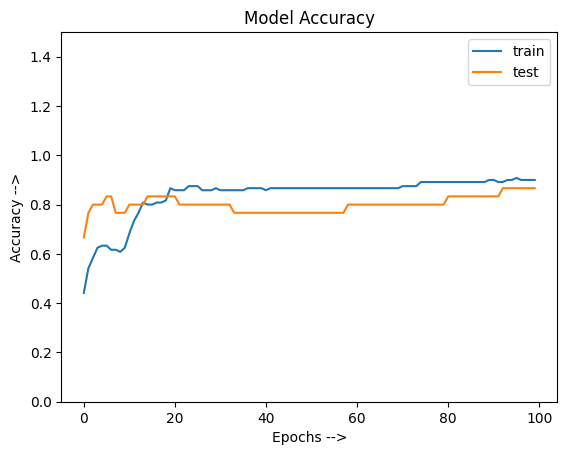

In [ ]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs -->')
plt.ylabel('Accuracy -->')
plt.legend(['train', 'test'])
plt.ylim(bottom=0)
plt.ylim(top=1.5)

#Step 5: Use learning rates as (0.1, 0.01, 0.001, 0.0001) and train the model.

In [ ]:
# LEARNING RATE= 0.1
opt = SGD(learning_rate = 0.1)
model = Sequential()
model.add(Dense(32, activation='leaky_relu', input_shape=(4,)))
model.add(Dense(32, activation='leaky_relu'))
model.add(Dense(16, activation='leaky_relu'))
model.add(Dense(3, activation='softmax'))

In [ ]:
model.compile(optimizer=opt,loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = 100, verbose = 0)
score = model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 31ms/step - loss: 0.0324 - accuracy: 0.9667


In [ ]:
print("\n\n" , "Test Loss: ", score[0])
print("Test Accuracy", score[1], "\n\n")



 Test Loss:  0.03240814059972763
Test Accuracy 0.9666666388511658 




(0.0, 1.5)

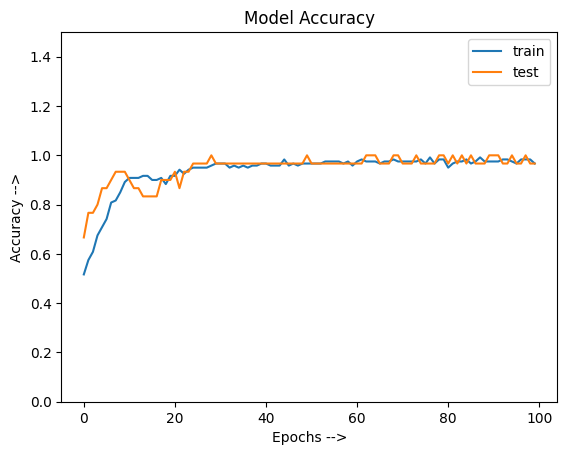

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs -->')
plt.ylabel('Accuracy -->')
plt.legend(['train', 'test'])
plt.ylim(bottom=0)
plt.ylim(top=1.5)

In [ ]:
# LEARNING RATE= 0.01
opt = SGD(learning_rate = 0.01)
model = Sequential()
model.add(Dense(32, activation='leaky_relu', input_shape=(4,)))
model.add(Dense(32, activation='leaky_relu'))
model.add(Dense(16, activation='leaky_relu'))
model.add(Dense(3, activation='softmax'))

In [ ]:
model.compile(optimizer=opt,loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = 100, verbose = 0)
score = model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 29ms/step - loss: 0.3491 - accuracy: 0.9000


In [ ]:
print("\n\n" , "Test Loss: ", score[0])
print("Test Accuracy", score[1], "\n\n")



 Test Loss:  0.349069744348526
Test Accuracy 0.8999999761581421 




(0.0, 1.5)

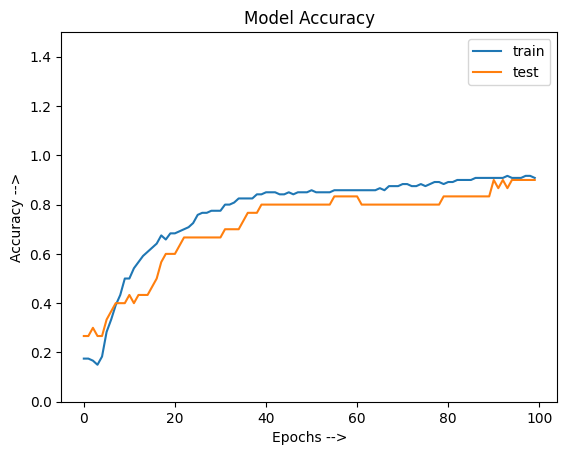

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs -->')
plt.ylabel('Accuracy -->')
plt.legend(['train', 'test'])
plt.ylim(bottom=0)
plt.ylim(top=1.5)

In [ ]:
# LEARNING RATE= 0.001
opt = SGD(learning_rate = 0.001)
model = Sequential()
model.add(Dense(32, activation='leaky_relu', input_shape=(4,)))
model.add(Dense(32, activation='leaky_relu'))
model.add(Dense(16, activation='leaky_relu'))
model.add(Dense(3, activation='softmax'))

In [ ]:
model.compile(optimizer=opt,loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = 100, verbose = 0)
score = model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 29ms/step - loss: 0.9844 - accuracy: 0.7000


In [ ]:
print("\n\n" , "Test Loss: ", score[0])
print("Test Accuracy", score[1], "\n\n")



 Test Loss:  0.9843763709068298
Test Accuracy 0.699999988079071 




(0.0, 1.5)

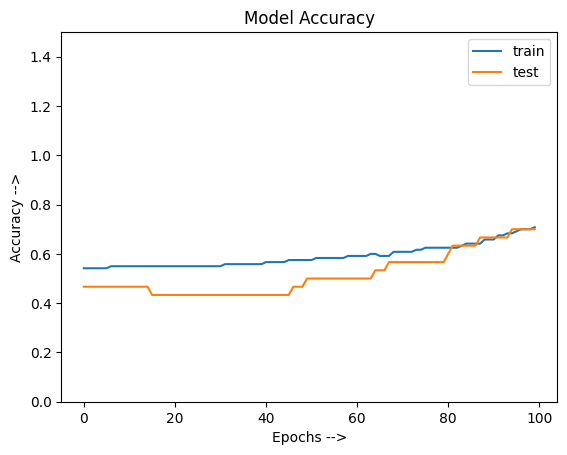

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs -->')
plt.ylabel('Accuracy -->')
plt.legend(['train', 'test'])
plt.ylim(bottom=0)
plt.ylim(top=1.5)

In [ ]:
# LEARNING RATE= 0.0001
opt = SGD(learning_rate = 0.0001)
model = Sequential()
model.add(Dense(32, activation='leaky_relu', input_shape=(4,)))
model.add(Dense(32, activation='leaky_relu'))
model.add(Dense(16, activation='leaky_relu'))
model.add(Dense(3, activation='softmax'))

In [ ]:
model.compile(optimizer=opt,loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = 100, verbose = 0)
score = model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 27ms/step - loss: 1.1222 - accuracy: 0.0000e+00


In [ ]:
print("\n\n" , "Test Loss: ", score[0])
print("Test Accuracy", score[1], "\n\n")



 Test Loss:  1.122212529182434
Test Accuracy 0.0 




(0.0, 1.5)

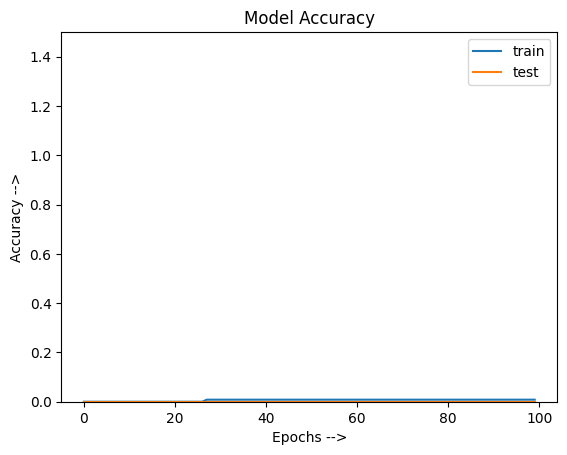

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs -->')
plt.ylabel('Accuracy -->')
plt.legend(['train', 'test'])
plt.ylim(bottom=0)
plt.ylim(top=1.5)

###As we can see from the above graphs, the best models with training and testing loss least, we get for the learning rates 0.1 and 0.01. Whereas the models with 0.001 and 0.0001 are not giving good accuracy and the loss is too much

#Step 6: For Learning rate=(0.1, 0.01) AND Momentum=(0.1, 0.5)

In [ ]:
# LEARNING RATE= 0.1 and MOMENTUM= 0.1
opt = SGD(learning_rate = 0.1, momentum=0.1)
model = Sequential()
model.add(Dense(32, activation='leaky_relu', input_shape=(4,)))
model.add(Dense(32, activation='leaky_relu'))
model.add(Dense(16, activation='leaky_relu'))
model.add(Dense(3, activation='softmax'))

In [ ]:
model.compile(optimizer=opt,loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = 100, verbose = 0)
score = model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 30ms/step - loss: 0.0403 - accuracy: 0.9667


In [ ]:
print("\n\n" , "Test Loss: ", score[0])
print("Test Accuracy", score[1], "\n\n")



 Test Loss:  0.04025943577289581
Test Accuracy 0.9666666388511658 




(0.0, 1.5)

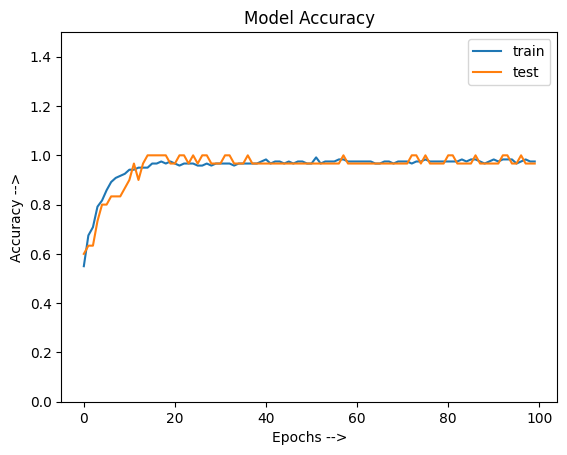

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs -->')
plt.ylabel('Accuracy -->')
plt.legend(['train', 'test'])
plt.ylim(bottom=0)
plt.ylim(top=1.5)

In [ ]:
# LEARNING RATE= 0.1 and MOMENTUM=0.5
opt = SGD(learning_rate = 0.01, momentum=0.5)
model = Sequential()
model.add(Dense(32, activation='leaky_relu', input_shape=(4,)))
model.add(Dense(32, activation='leaky_relu'))
model.add(Dense(16, activation='leaky_relu'))
model.add(Dense(3, activation='softmax'))

In [ ]:
model.compile(optimizer=opt,loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = 100, verbose = 0)
score = model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 28ms/step - loss: 0.2639 - accuracy: 0.8667


In [ ]:
print("\n\n" , "Test Loss: ", score[0])
print("Test Accuracy", score[1], "\n\n")



 Test Loss:  0.263862282037735
Test Accuracy 0.8666666746139526 




(0.0, 1.5)

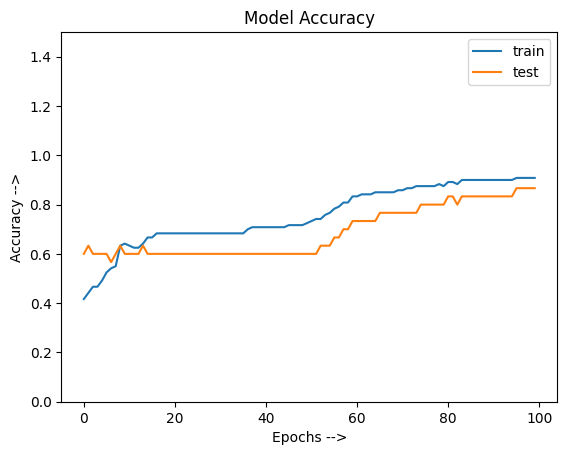

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs -->')
plt.ylabel('Accuracy -->')
plt.legend(['train', 'test'])
plt.ylim(bottom=0)
plt.ylim(top=1.5)

In [ ]:
# LEARNING RATE= 0.01 and MOMENTUM=0.1
opt = SGD(learning_rate = 0.01, momentum=0.1)
model = Sequential()
model.add(Dense(32, activation='leaky_relu', input_shape=(4,)))
model.add(Dense(32, activation='leaky_relu'))
model.add(Dense(16, activation='leaky_relu'))
model.add(Dense(3, activation='softmax'))

In [ ]:
model.compile(optimizer=opt,loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = 100, verbose = 0)
score = model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 32ms/step - loss: 0.3135 - accuracy: 0.8667


In [ ]:
print("\n\n" , "Test Loss: ", score[0])
print("Test Accuracy", score[1], "\n\n")



 Test Loss:  0.3135431408882141
Test Accuracy 0.8666666746139526 




(0.0, 1.5)

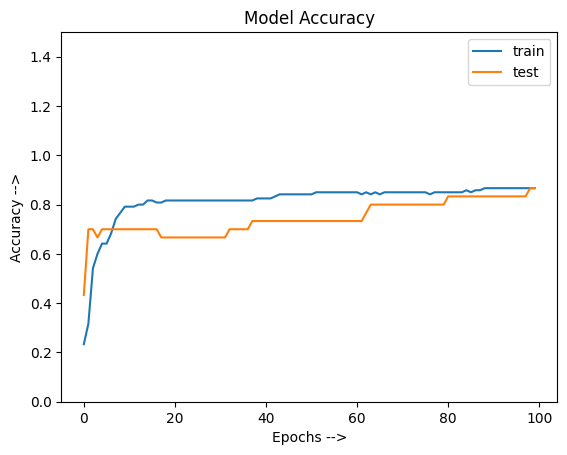

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs -->')
plt.ylabel('Accuracy -->')
plt.legend(['train', 'test'])
plt.ylim(bottom=0)
plt.ylim(top=1.5)

In [ ]:
# LEARNING RATE= 0.01 and MOMENTUM= 0.5
opt = SGD(learning_rate = 0.01, momentum=0.5)
model = Sequential()
model.add(Dense(32, activation='leaky_relu', input_shape=(4,)))
model.add(Dense(32, activation='leaky_relu'))
model.add(Dense(16, activation='leaky_relu'))
model.add(Dense(3, activation='softmax'))

In [ ]:
model.compile(optimizer=opt,loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = 100, verbose = 0)
score = model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 31ms/step - loss: 0.1348 - accuracy: 1.0000


In [ ]:
print("\n\n" , "Test Loss: ", score[0])
print("Test Accuracy", score[1], "\n\n")



 Test Loss:  0.1348203718662262
Test Accuracy 1.0 




(0.0, 1.5)

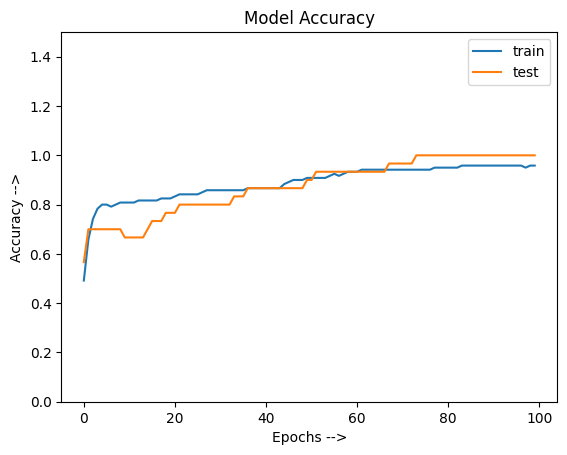

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs -->')
plt.ylabel('Accuracy -->')
plt.legend(['train', 'test'])
plt.ylim(bottom=0)
plt.ylim(top=1.5)

### Thus as we can see the BEST model so far we get is with Learning rate=0.01 and Momentum=0.5 which gives us the Test Accuracy=1 and Test Loss= 0.135